# サポートベクトルマシン
劣勾配アルゴリズムを使った線形モデルに対するサポートベクトルマシン

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# データ生成の関数
def generate_data(sample_size, random_state):
    np.random.seed(random_state)
    """Generate training data.

    Since
    f(x) = w^{T}x + b
    can be written as
    f(x) = (w^{T}, b)(x^{T}, 1)^{T},
    for the sake of simpler implementation of SVM,
    we return (x^{T}, 1)^{T} instead of x

    :param sample_size: number of data points in the sample
    :return: a tuple of data point and label
    """

    x = np.random.normal(size=(sample_size, 3))
    x[:, 2] = 1.
    x[:sample_size // 2, 0] -= 5.
    x[sample_size // 2:, 0] += 5.
    y = np.concatenate([np.ones(sample_size // 2, dtype=np.int64),
                        -np.ones(sample_size // 2, dtype=np.int64)])
    x[:3, 1] -= 5.
    y[:3] = -1
    x[-3:, 1] += 5.
    y[-3:] = 1
    return x, y

In [3]:
def svm(x, y, l, lr):
    """Linear SVM implementation using gradient descent algorithm.

    f_w(x) = w^{T} (x^{T}, 1)^{T}

    :param x: data points
    :param y: label
    :param l: regularization parameter
    :param lr: learning rate
    :return: three-dimensional vector w
    """

    w = np.zeros(3)
    prev_w = w.copy()
    for i in range(10 ** 3):

        # core
        f = np.dot(x,w) * y
        f_p = (1 - f > 0)
        f_delta = np.zeros((len(f),3))
        f_delta[f_p] = - np.tile(y[f_p],(3,1)).T * x[f_p]
        w -= lr*(np.sum(f_delta,axis=0) + l*w)
        #print(w)
        #print(np.linalg.norm(w - prev_w))

        if np.linalg.norm(w - prev_w) < 1e-3:
            print('update count', i)
            break
        prev_w = w.copy()

    return w

In [4]:
# 可視化関数
def visualize(x, y, w):
    plt.clf()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.scatter(x[y == 1, 0], x[y == 1, 1])
    plt.scatter(x[y == -1, 0], x[y == -1, 1])
    plt.plot([-10, 10], -(w[2] + np.array([-10, 10]) * w[0]) / w[1])
    plt.savefig('lecture6-h2.png')

update count 377


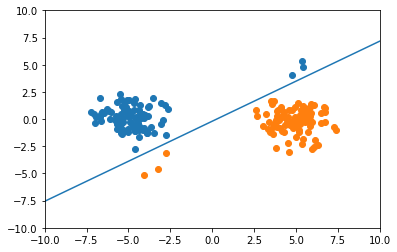

In [5]:
#実行
x, y = generate_data(200, 0) #generate_data(the number of data, random_state)
w = svm(x, y, l= 0.1, lr= 0.001)
visualize(x, y, w)